Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Make sure that in addition to the code, you provide written answers for all questions of the assignment. 

Below, please fill in your name and collaborators:

In [1]:
NAME = "Bruno Gonzalez"
COLLABORATORS = ""

## Assignment 2 - Data Analysis using Pandas
**(15 points total)**

For this assignment, we will analyze the open dataset with data on the passengers aboard the Titanic.

The data file for this assignment can be downloaded from Kaggle website: https://www.kaggle.com/c/titanic/data, file `train.csv`. It is also attached to the assignment page. The definition of all variables can be found on the same Kaggle page, in the Data Dictionary section.

Read the data from the file into pandas DataFrame. Analyze, clean and transform the data to answer the following question: 

**What categories of passengers were most likely to survive the Titanic disaster?**

**Question 1.**  _(4 points)_
* The answer to the main question - What categories of passengers were most likely to survive the Titanic disaster? _(2 points)_
* The detailed explanation of the logic of the analysis _(2 points)_

**Question 2.**  _(3 points)_
* What other attributes did you use for the analysis? Explain how you used them and why you decided to use them. 
* Provide a complete list of all attributes used.

**Question 3.**  _(3 points)_
* Did you engineer any attributes (created new attributes)? If yes, explain the rationale and how the new attributes were used in the analysis?
* If you have excluded any attributes from the analysis, provide an explanation why you believe they can be excluded.

**Question 4.**  _(5 points)_
* How did you treat missing values for those attributes that you included in the analysis (for example, `age` attribute)? Provide a detailed explanation in the comments.


## Analysis

In [174]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;

In [139]:
# Reading the data
df = pd.read_csv("./train.csv")

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [141]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Above, I print the number of distinct values for each column. The objective is to see how to treat each variable.

In [147]:
for c in df.columns[2:]:
    print("-----------------------------------")
    print("Variable {}: \n \t Categories: {} \n \t dtype: {} \n \t Nulls: {}".format(c,df[c].nunique(dropna=False),df[c].dtype,df[c].isnull().sum()))

-----------------------------------
Variable Pclass: 
 	 Categories: 3 
 	 dtype: int64 
 	 Nulls: 0
-----------------------------------
Variable Name: 
 	 Categories: 891 
 	 dtype: object 
 	 Nulls: 0
-----------------------------------
Variable Sex: 
 	 Categories: 2 
 	 dtype: object 
 	 Nulls: 0
-----------------------------------
Variable Age: 
 	 Categories: 89 
 	 dtype: float64 
 	 Nulls: 177
-----------------------------------
Variable SibSp: 
 	 Categories: 7 
 	 dtype: int64 
 	 Nulls: 0
-----------------------------------
Variable Parch: 
 	 Categories: 7 
 	 dtype: int64 
 	 Nulls: 0
-----------------------------------
Variable Ticket: 
 	 Categories: 681 
 	 dtype: object 
 	 Nulls: 0
-----------------------------------
Variable Fare: 
 	 Categories: 248 
 	 dtype: float64 
 	 Nulls: 0
-----------------------------------
Variable Cabin: 
 	 Categories: 148 
 	 dtype: object 
 	 Nulls: 687
-----------------------------------
Variable Embarked: 
 	 Categories: 4 
 	 dtype:

First I will pick the variables with less than 5 categories and not null values to analyze:
* Pclass
* Sex
* Embarked

Also, I will take *Age*, grouped in two equally weighted bins. There are 'null' values, which I'll treat them as so, and ingore them when is the case.

In [152]:
df['Age_interval'] = pd.qcut(df.Age, 2)

Now I'll take a quick look of each category survival rate.

-----------------------------------
Number of categories for Pclass: 3
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


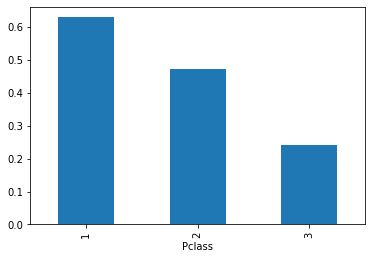

-----------------------------------
Number of categories for Name: 891
-----------------------------------
Number of categories for Sex: 2
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


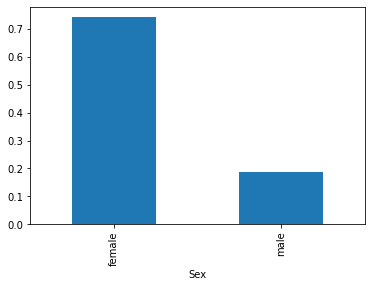

-----------------------------------
Number of categories for Age: 89
-----------------------------------
Number of categories for SibSp: 7
-----------------------------------
Number of categories for Parch: 7
-----------------------------------
Number of categories for Ticket: 681
-----------------------------------
Number of categories for Fare: 248
-----------------------------------
Number of categories for Cabin: 148
-----------------------------------
Number of categories for Embarked: 4
Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


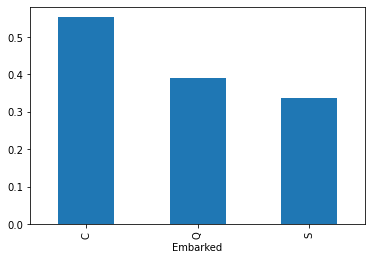

-----------------------------------
Number of categories for Age_interval: 3
Age_interval
(0.419, 28.0]    0.408840
(28.0, 80.0]     0.403409
Name: Survived, dtype: float64


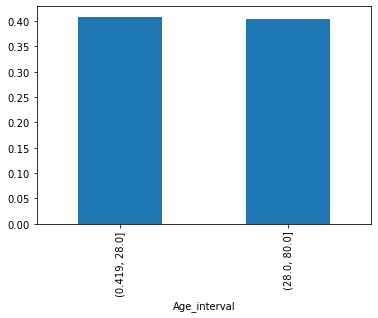

In [153]:
for c in df.columns[2:]:
    print("-----------------------------------")
    print("Number of categories for {}: {}".format(c,df[c].nunique(dropna=False)))
    ncat = df[c].nunique()
    if ncat<5:
        s = df.groupby(c)['Survived'].mean()
        print(s)
        s.plot.bar()
        plt.show()

Except for *Age* bins, every other variable seem pretty important. I'll just take a look on *Age* bins.

<AxesSubplot:xlabel='Pclass'>

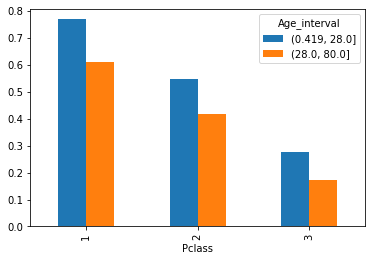

In [157]:
df.pivot_table('Survived', ['Pclass'], ['Age_interval']).plot.bar()#, aggfunc=['mean', 'count'])

It seems that *Age* is important if you drill into each class. The detail is lost when data is aggregated by class.

The max level of disagregations for the survive rate is in the table below.

In [185]:
df_agg = df.pivot_table('Survived', ['Pclass','Embarked'], ['Sex','Age_interval'], aggfunc=['mean', 'count'], dropna=False)
df_agg

mean                                          \
Sex                    female                       male                
Age_interval    (0.419, 28.0] (28.0, 80.0] (0.419, 28.0] (28.0, 80.0]   
Pclass Embarked                                                         
1      C             1.000000     0.961538      0.500000     0.416667   
       Q                  NaN     1.000000           NaN     0.000000   
       S             0.882353     1.000000      0.636364     0.320755   
2      C             1.000000          NaN      0.333333     0.000000   
       Q                  NaN     1.000000           NaN     0.000000   
       S             0.903226     0.914286      0.219512     0.102041   
3      C             0.714286     0.500000      0.400000     0.100000   
       Q             0.714286     0.000000      0.000000     0.142857   
       S             0.442308     0.333333      0.142857     0.135802   

                        count                                          
Sex                    female                       male               
Age_interval    (0.419, 28.0] (28.0, 80.0] (0.419, 28.0] (28.0, 80.0]  
Pclass Embarked                                                        
1      C                   12           26            12           24  
       Q                    0            1             0            1  
       S                   17           27            11           53  
2      C                    7            0             3            5  
       Q                    0            1             0            1  
       S                   31           35            41           49  
3      C                   14            2            15           10  
       Q                    7            3             7            7  
       S                   52           24           133           81

## Answers

**Question 1.**  _(4 points)_
* The answer to the main question - What categories of passengers were most likely to survive the Titanic disaster? _(2 points)_

**A.** Young women were the most likely to survive, especialy those from first and second class.

* The detailed explanation of the logic of the analysis _(2 points)_

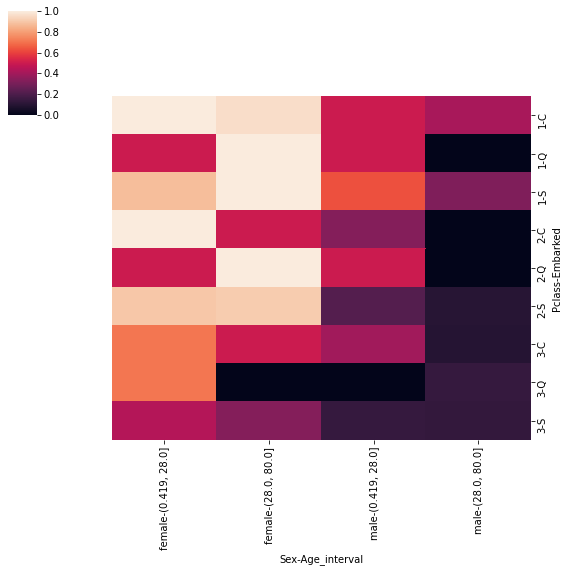

In [187]:
g = sns.clustermap(df_agg['mean'].fillna(0.5), row_cluster=False, col_cluster=False, figsize=(8,8))

In the image above, it can be seen that on the top left corner the squares are lighter. Which confirms the results from the last question.

**Question 2.**  _(3 points)_
* What other attributes did you use for the analysis? Explain how you used them and why you decided to use them. 


**A.** Besides the *Class*, I used *Age*, *Sex* and *Embarked*. I used these because individually, each one of them, had a visible impact on the survive rate.

* Provide a complete list of all attributes used.

**A.**
* Pclass
* Sex
* Embarked
* Age

**Question 3.**  _(3 points)_
* Did you engineer any attributes (created new attributes)? If yes, explain the rationale and how the new attributes were used in the analysis?

**A.** Yes. I create *Age_inverval*, dividing half observations (younger) in the first interval, and the older half in the second interval. The attribute was used to analyze the survival rate in this category.

* If you have excluded any attributes from the analysis, provide an explanation why you believe they can be excluded.

**A.** I didn't include variables with several categories, because due the granularity of the information they, lacks of the unifying attribute that is required.

**Question 4.**  _(5 points)_
* How did you treat missing values for those attributes that you included in the analysis (for example, `age` attribute)? Provide a detailed explanation in the comments.

**A.** In that case, I left the "Null" observations and didn't count them for the analysis. In the case of the visualization, I substitute the value for $0.5$ to avoid bias in the chart.